# Statement
Prepare a classification model using Naive Bayes for salary data 

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Training Dataset

In [3]:
train = pd.read_csv("SalaryData_Train.csv")

In [4]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<b>Data Description:</b>

<b>age</b> -- age of a person

<b>workclass</b>	-- A work class is a grouping of work 

<b>education</b>	-- Education of an individuals	

<b>maritalstatus</b> -- Marital status of an individulas	

<b>occupation</b>	 -- occupation of an individuals

<b>relationship</b> -- 	

<b>race</b> --  Race of an Individual

<b>sex</b> --  Gender of an Individual

<b>capitalgain</b> --  profit received from the sale of an investment	

<b>capitalloss</b>	-- A decrease in the value of a capital asset

<b>hoursperweek</b> -- number of hours work per week	

<b>native</b> -- Native of an individual

<b>Salary</b> -- salary of an individual

In [5]:
train.shape

(30161, 14)

In [6]:
train.size

422254

In [7]:
#Checking Data Types of each column
train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
# Dexcriptive Statistics
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
#Checking for missing values
train.isnull()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30157,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30158,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30159,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

There are no missing values

In [12]:
#Checking for duplicate values
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30156    False
30157     True
30158    False
30159     True
30160    False
Length: 30161, dtype: bool

In [13]:
train.duplicated().sum()

3258

In [14]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [15]:
#dropping duplicated values
Train = train.drop_duplicates()
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [16]:
Train.shape

(26903, 14)

In [17]:
Train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [18]:
#Segregating Numerical and Categorical variables for further analysis
numerical = [feature for feature in Train.columns if Train[feature].dtypes != 'O']
categorical = [feature for feature in Train.columns if Train[feature].dtypes == 'O']

In [19]:
Train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [20]:
Train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [21]:
#Frequency Counts for Categorical Columns

for var in categorical:

    print(Train[var].value_counts())
    print()

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64

 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Ot

In [22]:
#correlation
Train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.077235,0.052684,0.072529
educationno,0.038048,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000


# Exploratory Data Analysis

<AxesSubplot:>

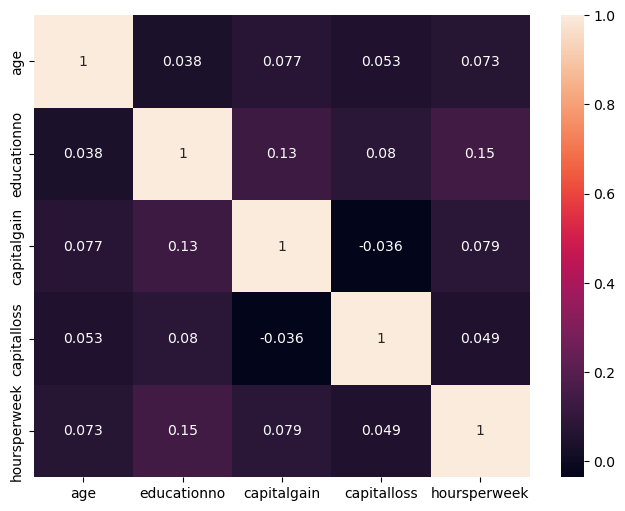

In [23]:
#heatmap for correlation
plt.figure(figsize=(8,6))
sns.heatmap(Train.corr(), annot=True)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


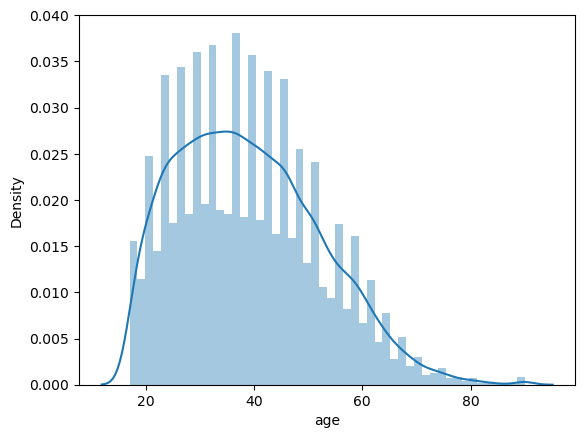

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


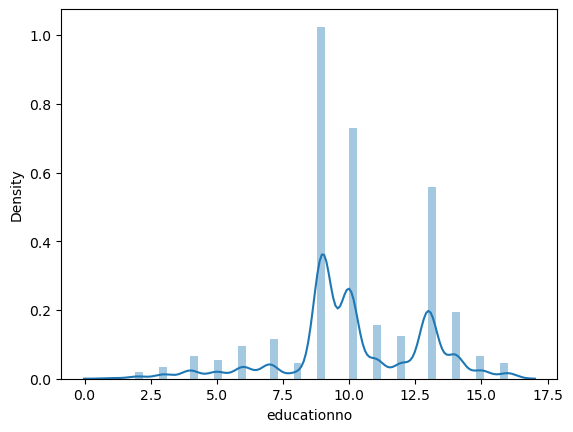

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


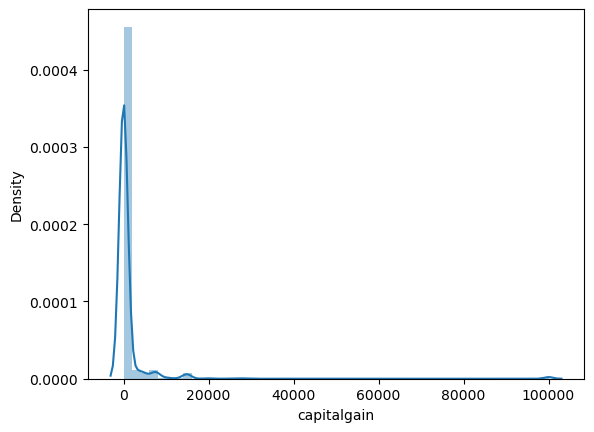

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


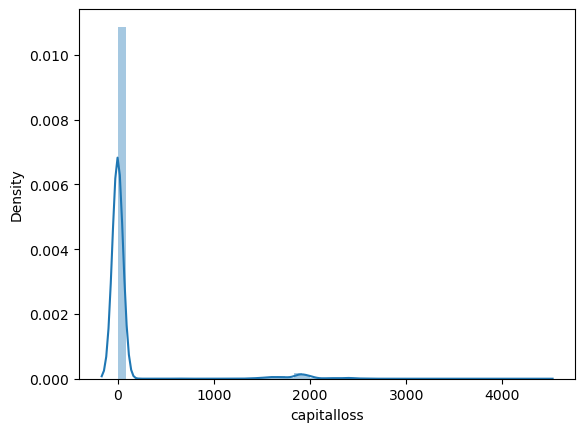

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


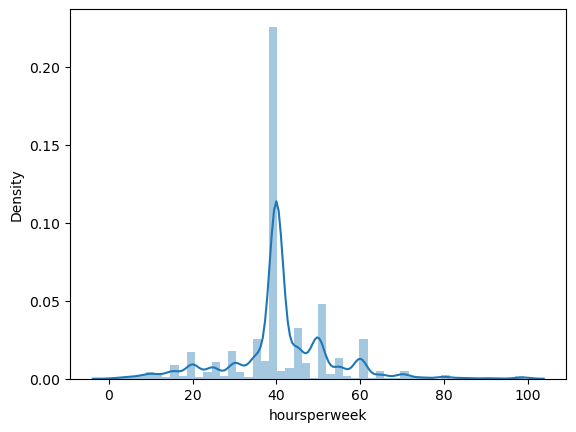

In [24]:
for feature in numerical:
    sns.distplot(Train[feature])
    plt.show()

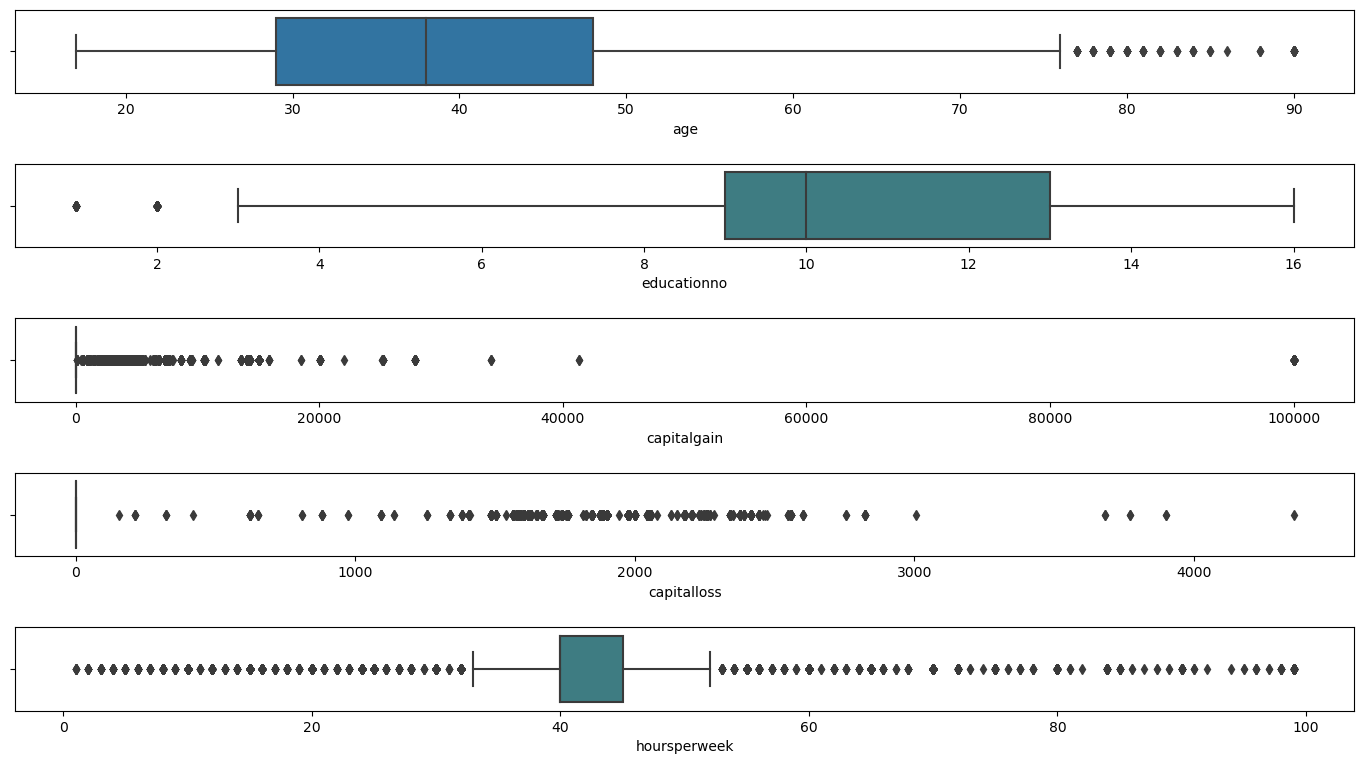

In [25]:
#Lets check outliers with help of boxplots
fig, axes = plt.subplots(5,1, figsize=(14,8))
sns.boxplot(x='age', data=Train, ax=axes[0])
sns.boxplot(x='educationno', data=Train, palette='crest', ax=axes[1])
sns.boxplot(x='capitalgain', data=Train, palette='crest', ax=axes[2])
sns.boxplot(x='capitalloss', data=Train, palette='crest', ax=axes[3])
sns.boxplot(x='hoursperweek', data=Train, palette='crest', ax=axes[4])
plt.tight_layout(pad=2.0)

There are outliers present in very large amount so we can't remove them from the data.

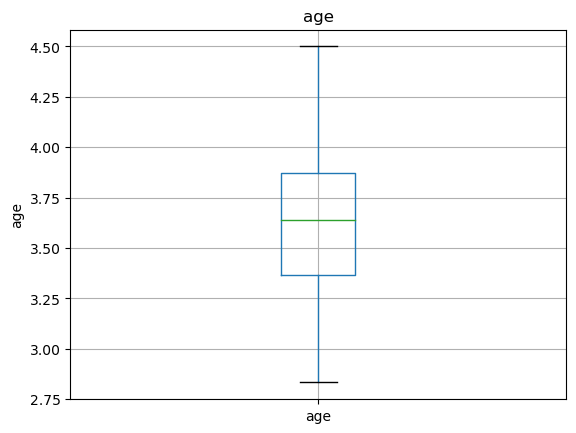

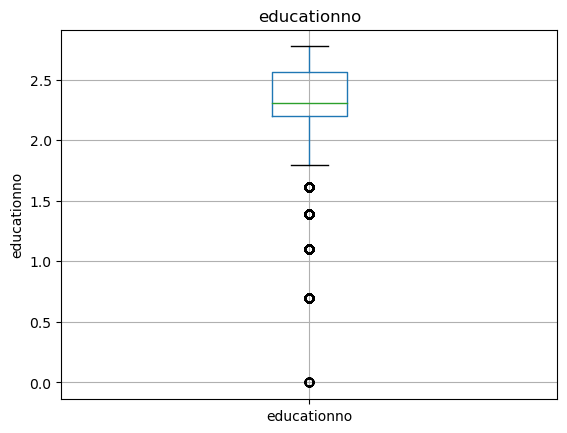

D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


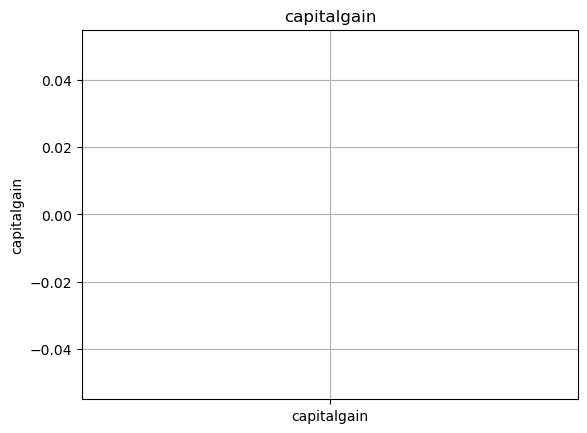

D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


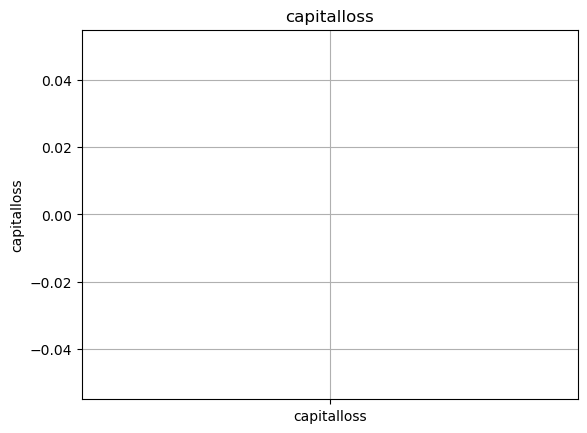

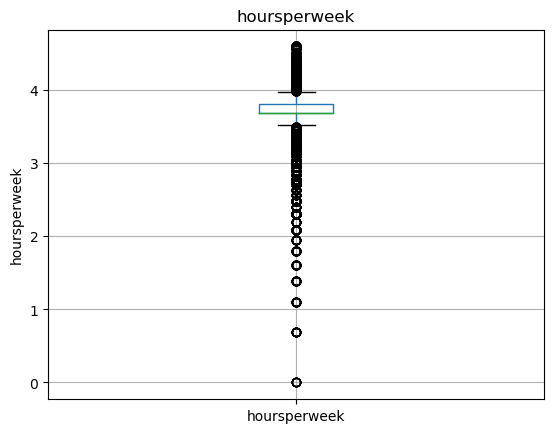

In [26]:
#logarithmic transformation
for feature in numerical:
    data=Train.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

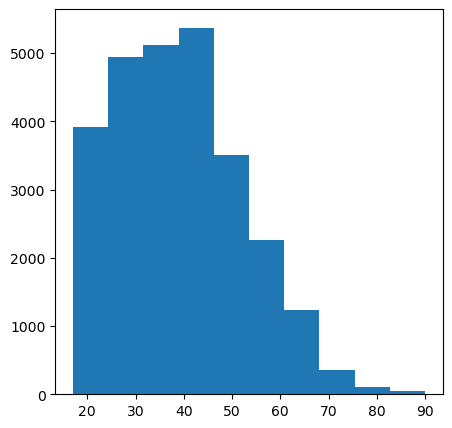

In [27]:
#Visulaizing age and hoursperweeks features
plt.figure(figsize=(5,5))
plt.hist(Train['age'])
plt.show()

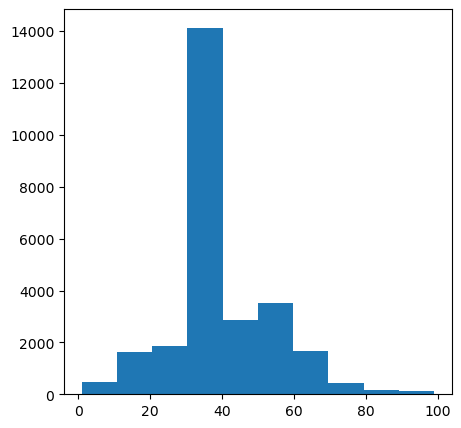

In [28]:
plt.figure(figsize=(5,5))
plt.hist(Train['hoursperweek'])
plt.show()

In [29]:
Train[['age','hoursperweek']].describe()

,age,hoursperweek
count,26903.000000,26903.000000
mean,39.049140,41.164591
std,13.188825,12.347051
min,17.000000,1.000000
25%,29.000000,40.000000
50%,38.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


In age feature, it ranges from 17 to 90, but the majority of them fall between the age of 20 to 40 (age 29 to 48 make the middle 50 percentile (25 to 75 percentile)).

hoursperweek have a fairly normal distribution with the range lying frm 1 hour to 100 hours per week.

In [30]:
#Categorical Variables
print("Number of Categorical features are : ",len(categorical))

Number of Categorical features are :  9


In [31]:
#Names of categorical columns
print("Names of Categorical Columns are : ", categorical)

Names of Categorical Columns are :  ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [32]:
#Unique values of the categorical columns
print("Unique values of each categorical column : ")

for var in Train[categorical]:
    print()
    print("Unique value of ", var, " is : ")
    print(Train[var].unique())

Unique values of each categorical column : 

Unique value of  workclass  is : 
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

Unique value of  education  is : 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

Unique value of  maritalstatus  is : 
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique value of  occupation  is : 
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

Unique value of  relationship  is : 
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Unique value of  race

In [33]:
#Value Counts for each value of categorical column
print("Frequency of each value :")
print()

for var in Train[categorical]:
    print("Value counts of ", var, "is: ")
    print(Train[var].value_counts())
    print()

Frequency of each value :

Value counts of  workclass is: 
 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

Value counts of  education is: 
 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64

Value counts of  maritalstatus is: 
 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

Value count

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


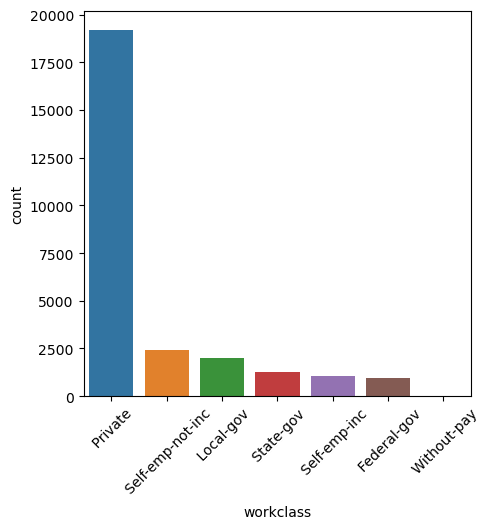

In [34]:
#Lets try some plots

plt.figure(figsize=(5,5))
sns.countplot(Train['workclass'], order=Train['workclass'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


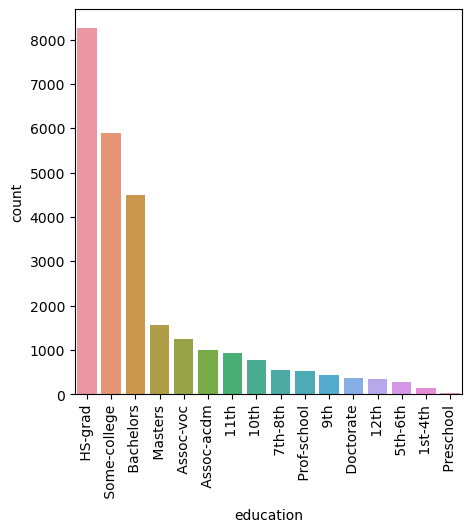

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(Train['education'],order=Train['education'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


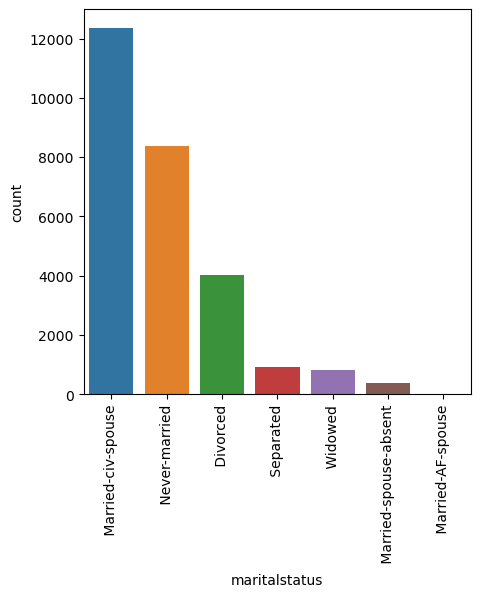

In [36]:
plt.figure(figsize=(5,5))
sns.countplot(Train['maritalstatus'],order=Train['maritalstatus'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


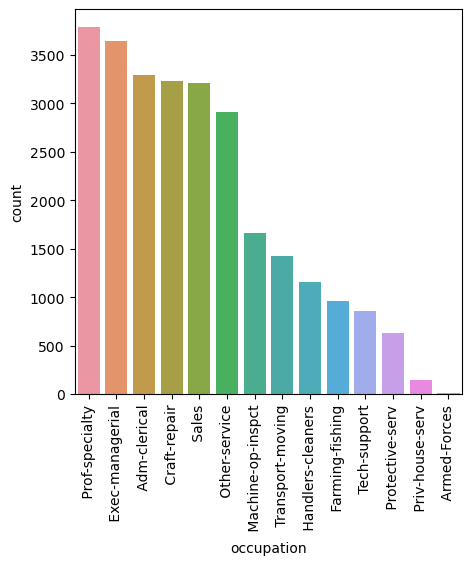

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(Train['occupation'], order=Train['occupation'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


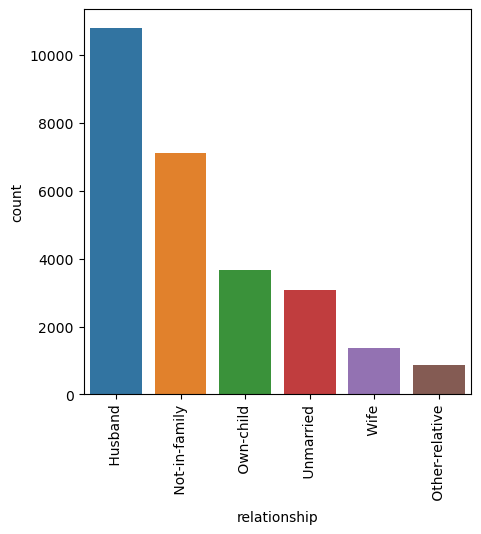

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(Train['relationship'], order=Train['relationship'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


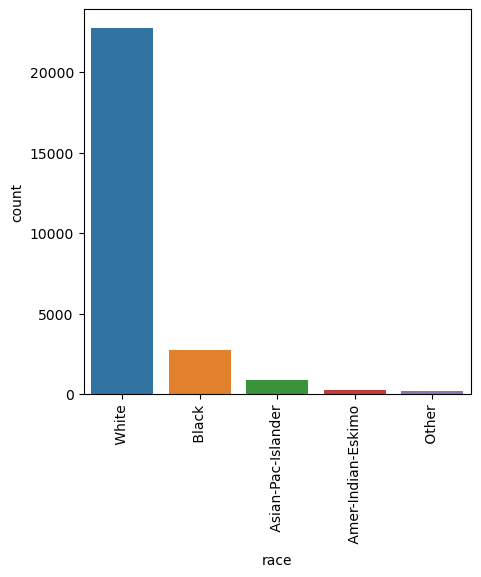

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(Train['race'], order=Train['race'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


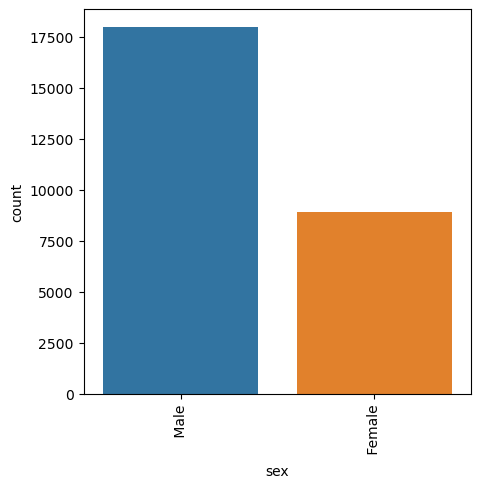

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(Train['sex'],order=Train['sex'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


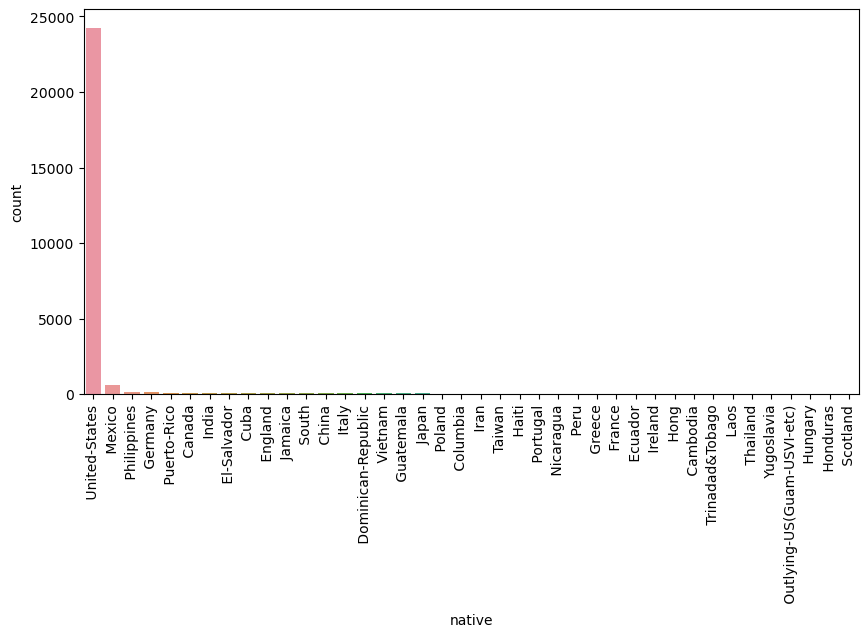

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(Train['native'], order=Train['native'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


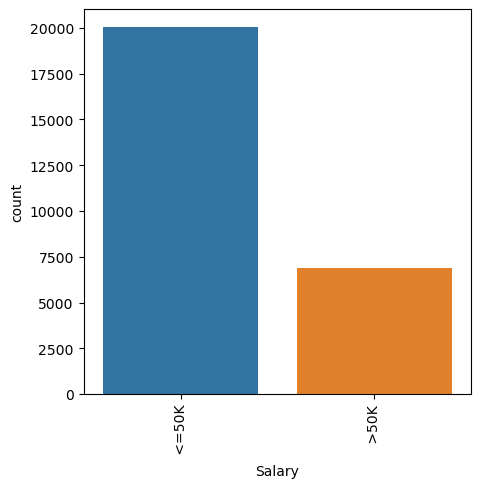

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(Train['Salary'], order=Train['Salary'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

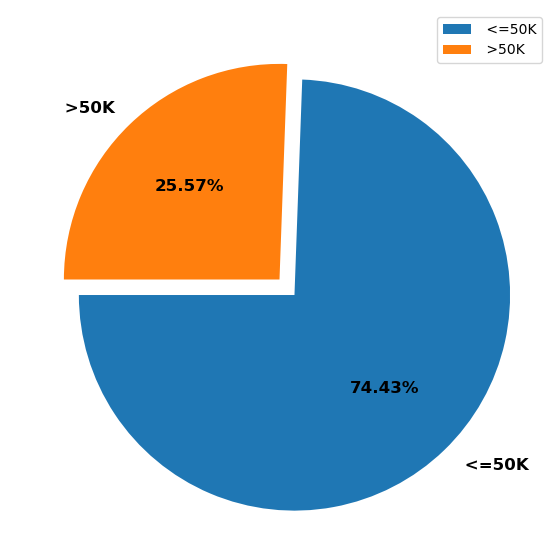

In [43]:
plt.figure(figsize=(7,7))

plt.pie(Train['Salary'].value_counts(),
       explode=[0.1,0.0],
       labels = Train.Salary.unique(),
       autopct = '%.2f%%',
       startangle=180,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc='upper right')
plt.show()

# Data Preprocessing

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
# Changing categorical columns with label encoder for model building
labelencoder = LabelEncoder()
for i in categorical:
    Train[i] = labelencoder.fit_transform(Train[i])

C:\Users\Yadnyeshwar\AppData\Local\Temp\ipykernel_7356\1173236853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train[i] = labelencoder.fit_transform(Train[i])


In [46]:
Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [47]:
len(Train.columns)

14

In [48]:
#splitting the train data in dependent and independent variables
x_train = Train[Train.columns[0:13]].values
y_train = Train[Train.columns[13]].values

In [49]:
x_train

array([[39,  5,  9, ...,  0, 40, 37],
       [50,  4,  9, ...,  0, 13, 37],
       [38,  2, 11, ...,  0, 40, 37],
       ...,
       [27,  2,  7, ...,  0, 38, 37],
       [58,  2, 11, ...,  0, 40, 37],
       [52,  3, 11, ...,  0, 40, 37]], dtype=int64)

In [50]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [51]:
#Normalization
def norm(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [52]:
x_train = norm(x_train)

In [53]:
x_train

array([[3.900039e-04, 5.000050e-05, 9.000090e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [5.000050e-04, 4.000040e-05, 9.000090e-05, ..., 0.000000e+00,
        1.300013e-04, 3.700037e-04],
       [3.800038e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       ...,
       [2.700027e-04, 2.000020e-05, 7.000070e-05, ..., 0.000000e+00,
        3.800038e-04, 3.700037e-04],
       [5.800058e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [5.200052e-04, 3.000030e-05, 1.100011e-04, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04]])

# Training Various Naive Bayes model for Classification

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [55]:
#Multinomial Model
M_model = MultinomialNB()

In [56]:
train_M_model = M_model.fit(x_train, y_train).predict(x_train)

In [57]:
train_M_model

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
accuracy_score(y_train, train_M_model)

0.7442664386871353

In [59]:
confusion_matrix(y_train, train_M_model)

array([[20023,     0],
       [ 6880,     0]], dtype=int64)

In [60]:
#Gaussian Model
from sklearn.naive_bayes import GaussianNB

In [61]:
G_model = GaussianNB()

In [62]:
train_G_model = G_model.fit(x_train, y_train).predict(x_train)

In [63]:
train_G_model

array([0, 0, 0, ..., 0, 0, 1])

In [64]:
accuracy_score(y_train, train_G_model)

0.7933687692822362

In [65]:
confusion_matrix(y_train, train_G_model)

array([[18941,  1082],
       [ 4477,  2403]], dtype=int64)

In [66]:
#Categorial model
from sklearn.naive_bayes import CategoricalNB

In [67]:
C_model = CategoricalNB()

In [68]:
train_C_model = C_model.fit(x_train, y_train).predict(x_train)

In [69]:
train_C_model

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
accuracy_score(y_train, train_C_model)

0.7497305133256514

In [71]:
confusion_matrix(y_train, train_C_model)

array([[20023,     0],
       [ 6733,   147]], dtype=int64)

From the above results, we can conclude that the best trained model is Gaussian's model.

We will go ahead with that model.

# Importing Test dataset

In [72]:
test = pd.read_csv("SalaryData_Test.csv")

In [73]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [74]:
test.shape

(15060, 14)

In [75]:
test.size

210840

In [76]:
#Descriptive Statistics
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [78]:
#Checking for null values
test.isnull()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15056,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15057,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15058,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [79]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

No null values present 

In [80]:
#Checking for duplicate values
test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057    False
15058    False
15059    False
Length: 15060, dtype: bool

In [81]:
test.duplicated().sum()

930

In [82]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [83]:
#Dropping Duplicate values
Test = test.drop_duplicates()

In [84]:
Test.shape

(14130, 14)

In [85]:
Test.size

197820

In [86]:
# Label encoding Categorical Columns
for i in categorical:
    Test[i] = labelencoder.fit_transform(Test[i])

C:\Users\Yadnyeshwar\AppData\Local\Temp\ipykernel_7356\3852330036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test[i] = labelencoder.fit_transform(Test[i])


In [87]:
Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [88]:
Test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [89]:
#splitting the train data in dependent and independent variables
x_test = Test[Test.columns[0:13]].values
y_test = Test[Test.columns[13]].values

In [90]:
x_test

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]], dtype=int64)

In [91]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

In [92]:
# Normalization
x_test = norm(x_test)
x_test

array([[2.500025e-04, 2.000020e-05, 1.000010e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [3.800038e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        5.000050e-04, 3.700037e-04],
       [2.800028e-04, 1.000010e-05, 7.000070e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       ...,
       [3.800038e-04, 2.000020e-05, 9.000090e-05, ..., 0.000000e+00,
        5.000050e-04, 3.700037e-04],
       [4.400044e-04, 2.000020e-05, 9.000090e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [3.500035e-04, 3.000030e-05, 9.000090e-05, ..., 0.000000e+00,
        6.000060e-04, 3.700037e-04]])

# Testing on Naive Bayes Gaussian Model

In [93]:
test_G_model = G_model.fit(x_test, y_test).predict(x_test)

In [94]:
accuracy_score(y_test, test_G_model)

0.7940552016985138

In [95]:
confusion_matrix(y_test, test_G_model)

array([[10057,   563],
       [ 2347,  1163]], dtype=int64)